# ¿Cómo debo fijar el precio del seguro de auto en los Estados Unidos?

## Introduccion

**Contexto comercial.** La capacidad de cotizar una cotización de seguro correctamente tiene un impacto significativo en las decisiones de gestión y los estados financieros de las aseguradoras. Usted es el científico de datos jefe de una gran compañía de seguros y tiene la tarea de crear un modelo predictivo preciso para comprender qué factores afectan el monto de la reclamación. Sus hallazgos se utilizarán como base para tomar mejores decisiones de gestión sobre inversiones, nuevos productos y estrategia de ventas, generar confianza y estabilidad a través de estados financieros precisos. Su objetivo es utilizar los datos para predecir la gravedad de las reclamaciones de seguros.

**Problema comercial.** Su tarea es **construir un modelo para predecir el costo del seguro a partir de datos utilizando varias características de un titular de póliza.**

**Contexto analítico.** Los datos residen en un archivo CSV que se ha limpiado previamente para usted y se puede leer directamente. A lo largo del caso, estará iterando en su modelo inicial muchas veces en función de las dificultades comunes que comentamos en casos anteriores.

In [1]:
### Librerias basicas

import pandas                  as pd
import numpy                   as np
import matplotlib.pyplot       as plt
import seaborn                 as sns
import statsmodels.api         as sm
import statsmodels.formula.api as smf
#import plotly.plotly           as py
import os

# tema
plt.style.use('ggplot')

## Entrar a los datos

In [2]:
DATA = pd.read_csv('ALLSTATEcost-cleaned.csv',
    dtype = { # indicar variables categoricas
        "A": "category",
        "B": "category",
        "C": "category",
        "D": "category",
        "E": "category",
        "F": "category",
        "G": "category",
        "car_value": "category",
        "day": "category",
        "state": "category",
    }
)

Columnas de interes: 

1. **day**: Day of the week (0-6, 0=Monday)
2. **state**: State where shopping point occurred
3. **group_size**: How many people will be covered under the policy (1, 2, 3 or 4) 
4. **homeowner**: Whether the customer owns a home (0=no, 1=yes)
5. **car_age**: Age of the customer's car (How old the car is)
6. **car_value**: Value of the car when it was new
7. **risk_factor**: An ordinal assessment of how risky the customer is (0,1, 2, 3, 4) 
8. **age_oldest**: Age of the oldest person in customer's group
9. **age_youngest**: Age of the youngest person in customer's group
10. **married_couple**: Does the customer group contain a married couple (0=no, 1=yes) 
11. **C_previous**: What the customer formerly had or currently has for product option C (0=nothing, 1, 2, 3,4)
12. **duration_previous**: How long (in years) the customer was covered by their previous issuer
13. **A,B,C,D,E,F,G**: The coverage options:
14. **A**: Collision (levels: 0, 1, 2);
15. **B**: Towing (levels: 0, 1);
16. **C**: Bodily Injury (BI, levels: 1, 2, 3, 4);
17. **D**: Property Damage (PD, levels 1, 2, 3);
18. **E**: Rental Reimbursement (RR, levels: 0, 1);
19. **F**: Comprehensive (Comp, levels: 0, 1, 2, 3);
20. **G**: Medical/Personal Injury Protection (Med/PIP, levels: 1, 2, 3, 4)
21. **cost**: cost of the quoted coverage options 

In [3]:
DATA.head(10)

,day,state,group_size,homeowner,car_age,car_value,risk_factor,age_oldest,age_youngest,married_couple,C_previous,duration_previous,A,B,C,D,E,F,G,cost
0,1,OK,1,0,9,f,0.0,24,24,0,3.0,9.0,0,0,1,1,0,0,4,543
1,1,OK,1,0,9,f,0.0,24,24,0,3.0,9.0,2,1,1,3,1,3,2,611
2,4,PA,1,1,7,f,0.0,74,74,0,2.0,15.0,2,0,2,3,1,2,2,691
3,4,PA,1,1,7,f,0.0,74,74,0,2.0,15.0,2,0,2,3,1,2,2,695
4,3,AR,1,0,4,d,4.0,26,26,0,3.0,1.0,1,0,1,1,0,2,2,628
5,3,AR,1,0,4,d,4.0,26,26,0,3.0,1.0,1,0,2,1,0,2,2,625
6,3,AR,1,0,4,d,4.0,26,26,0,3.0,1.0,1,0,2,1,0,2,2,628
7,1,OK,1,0,13,f,3.0,22,22,0,0.0,0.0,0,0,1,1,0,0,2,596
8,1,OK,1,0,13,f,3.0,22,22,0,0.0,0.0,2,0,1,1,0,3,2,711
9,1,OK,1,0,13,f,3.0,22,22,0,0.0,0.0,2,0,1,1,0,3,2,722


### Ejercicio 1:

Escriba código para visualizar la relación entre el costo y las siguientes variables. Elija sus parcelas juiciosamente en función de lo que sabe sobre cada variable. Los diferentes tipos de variables (categóricas frente a numéricas) deben tener diferentes tipos de gráficos (por ejemplo, dispersión, diagrama de caja, diagrama de violín, etc.) Agrupa tus gráficos usando la función `plt.subplot()`.

1. `car_age`
2. `age_oldest`
3. `age_youngest`
4. `duration_previous`
5. `C_previous`
6. `homeowner`
7. `group_size`
8. `car_age`
9. Categories A-G

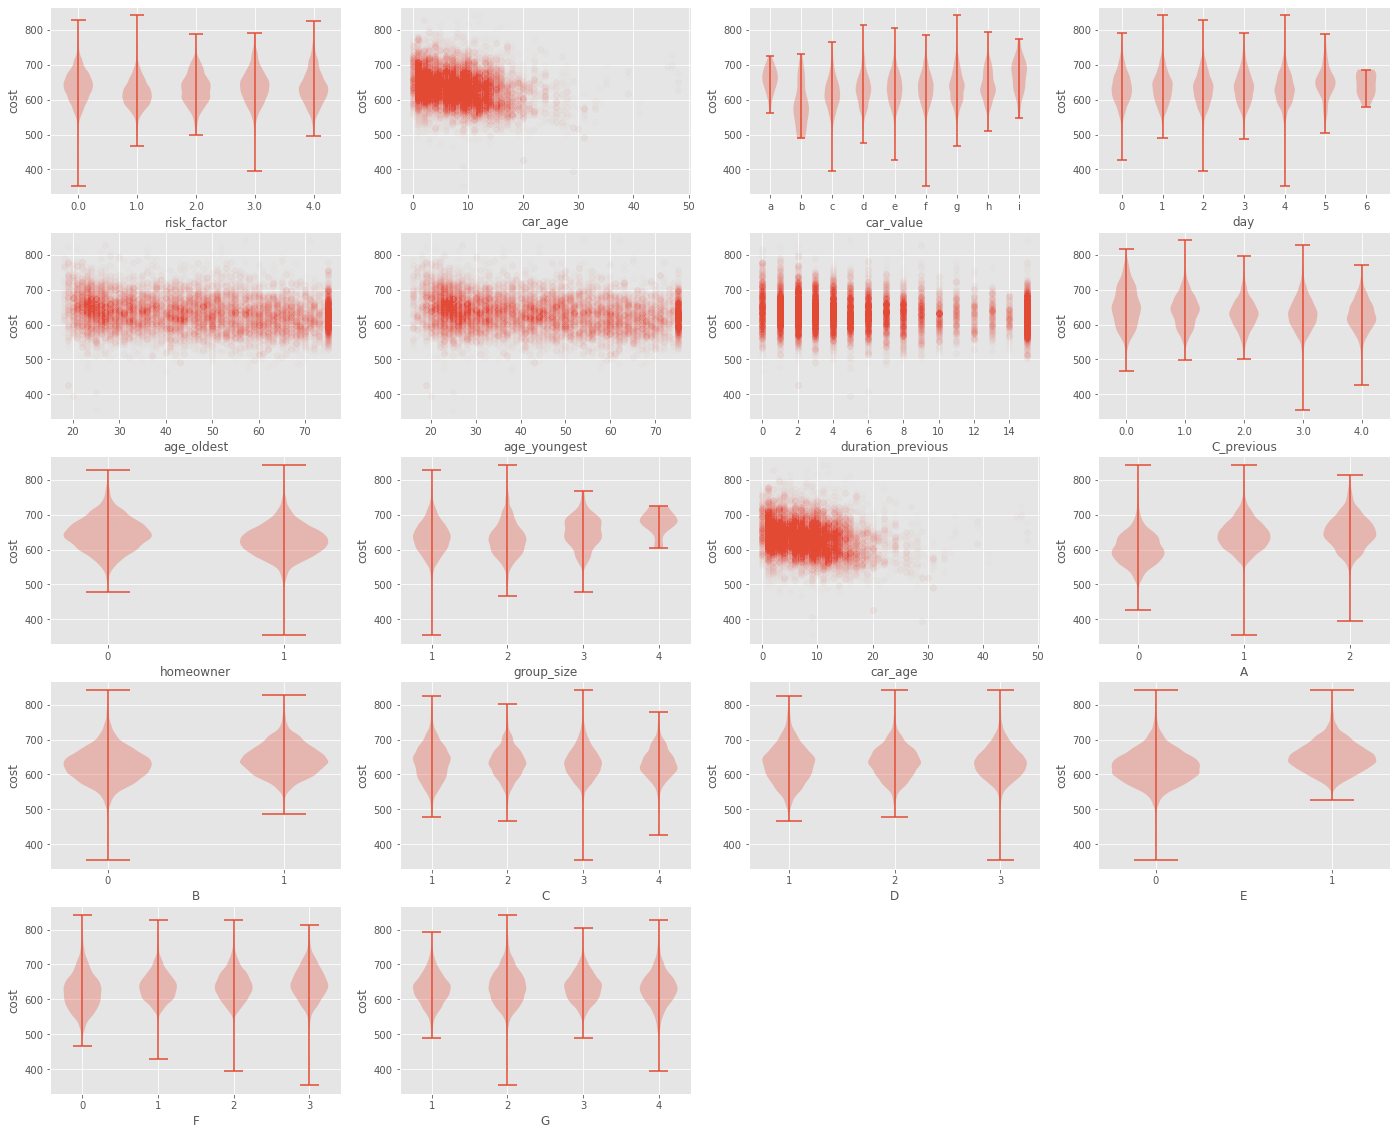

In [4]:
plt.figure(figsize=(24,20))
varstolook = ["risk_factor","car_age", "car_value", "day", "age_oldest", "age_youngest" ,
              "duration_previous","C_previous","homeowner","group_size",
              "car_age", "A", "B", "C", "D", "E", "F", "G"
              ]
for i,feature in enumerate(varstolook):
    plt.subplot(5,4,i+1)
    colvalues = DATA[feature]
    unique = sorted(set(colvalues.dropna().values))
    if len(unique) < 10:
        # categorical: hacemos un violin plot
        plt.violinplot([DATA.cost.values[colvalues == level] for level in unique],
                       positions=range(len(unique)))
        plt.xticks(range(len(unique)), labels=unique)
    else:
        plt.scatter(colvalues.values, DATA.cost.values, alpha=0.01, edgecolor=None)
    plt.xlabel(feature)
    plt.ylabel('cost')

### Ejercicio 2:

Convierta todos los datos categóricos para que estén en formato OHE

In [5]:
DATA_onehot = pd.get_dummies(DATA, columns=['state','car_value',
                              'A','B','C', 'D','E','F','G'],
                              )

In [6]:
DATA_onehot.head(10)

,day,group_size,homeowner,car_age,risk_factor,age_oldest,age_youngest,married_couple,C_previous,duration_previous,...,E_0,E_1,F_0,F_1,F_2,F_3,G_1,G_2,G_3,G_4
0,1,1,0,9,0.0,24,24,0,3.0,9.0,...,1,0,1,0,0,0,0,0,0,1
1,1,1,0,9,0.0,24,24,0,3.0,9.0,...,0,1,0,0,0,1,0,1,0,0
2,4,1,1,7,0.0,74,74,0,2.0,15.0,...,0,1,0,0,1,0,0,1,0,0
3,4,1,1,7,0.0,74,74,0,2.0,15.0,...,0,1,0,0,1,0,0,1,0,0
4,3,1,0,4,4.0,26,26,0,3.0,1.0,...,1,0,0,0,1,0,0,1,0,0
5,3,1,0,4,4.0,26,26,0,3.0,1.0,...,1,0,0,0,1,0,0,1,0,0
6,3,1,0,4,4.0,26,26,0,3.0,1.0,...,1,0,0,0,1,0,0,1,0,0
7,1,1,0,13,3.0,22,22,0,0.0,0.0,...,1,0,1,0,0,0,0,1,0,0
8,1,1,0,13,3.0,22,22,0,0.0,0.0,...,1,0,0,0,0,1,0,1,0,0
9,1,1,0,13,3.0,22,22,0,0.0,0.0,...,1,0,0,0,0,1,0,1,0,0


## Ajustar el modelo de regresion multiple

### Ejercicio 3:

Divida sus datos en conjuntos de entrenamiento y prueba (una división 80-20 es un buen punto de partida).

*Nota: Mantenga la semilla aleatoria como 2019 en la celda de código*

In [7]:
np.random.seed(2019) # semilla para hacer el analisi reproducible
ndata = len(DATA_onehot)
idx_train = np.random.choice(range(ndata),int(0.8*ndata),replace=False)
idx_test  = np.asarray(list(set(range(ndata)) - set(idx_train)))
train     = DATA.loc[idx_train]
test      = DATA.loc[idx_test]

### Ejercicio 4:

#### 4.1

Ajuste un modelo de regresión lineal múltiple a los datos de entrenamiento que comparan el costo de regresión con todas las demás variables. Llame a este `model1`. ¿Cuál es el valor de AIC?

In [8]:
reg_formula = "cost ~ " + " + ".join(col for col in DATA.columns if col != 'cost')
print(reg_formula)

cost ~ day + state + group_size + homeowner + car_age + car_value + risk_factor + age_oldest + age_youngest + married_couple + C_previous + duration_previous + A + B + C + D + E + F + G


In [9]:
model1 = smf.ols(formula = reg_formula, data = train).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                   cost   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                     128.5
Date:                Thu, 17 Nov 2022   Prob (F-statistic):               0.00
Time:                        18:54:07   Log-Likelihood:                -61631.
No. Observations:               12352   AIC:                         1.234e+05
Df Residuals:                   12278   BIC:                         1.240e+05
Df Model:                          73                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           682.1414      9.13

In [10]:
print(model1.aic)

123410.41443632482


#### 4.2 

Según el `model1`, ¿qué estados son los más y los menos caros?

**Respuesta.** DC y Nueva York son los estados más caros, mientras que Indiana (IA) parece ser el menos costoso.

#### 4.3

Interprete los coeficientes de `group_size`, `homeowner`, `car_age`, `risk_factor`, `age_oldest`, `age_youngest`       `married_couple` , `duration_previous`. ¿Los signos y valores de estos coeficientes tienen sentido para usted en el contexto de este problema empresarial?


**Respuesta.** Ser propietario reduce el costo de su seguro en alrededor de $14 en promedio, suponiendo que todo lo demás se mantenga igual. `car_age` tiene un coeficiente negativo; esto tiene sentido ya que los autos más viejos deberían pagar menos por el seguro ya que valen menos. Ser una pareja casada también reduce la tasa de seguro. Esto tiene sentido ya que las parejas podrían conducir a un hogar más estable financieramente.

`duration_previous` tiene un coeficiente negativo. Esto tiene sentido porque dice que si un cliente estuvo asegurado por una compañía anterior durante mucho tiempo, indica que el cliente no es un conductor arriesgado. Si el cliente pasa de una compañía de seguros a otra en un corto período de tiempo, entonces debería ser preocupante porque podrían ser conductores riesgosos que constantemente están siendo rechazados por varias compañías de seguros. Finalmente, los coeficientes de `age_oldest` y `age_youngest` son casi cero; esto tiene sentido ya que es improbable que la probabilidad y la magnitud de los daños al automóvil estén relacionadas de manera monótona con las edades de los niños.

### Ejercicio 5:

¿Qué variables del `model1` son estadísticamente significativas? (Para variables categóricas, considérelas significativas si al menos una de sus categorías es estadísticamente significativa). Vuelva a ajustar el modelo usando solo estas variables; llámalo `model2`. ¿Cómo se compara este modelo con el modelo anterior?


**Respuesta.** Debido a que estamos agregando tantas variables al modelo, apliquemos la corrección de Bonferroni para ajustar el umbral en el que considerar una variable como significativa. Hay un total de 73 grados de libertad, así que fijemos el umbral en 0.05/73:


In [11]:
model1.pvalues[model1.pvalues<0.05/73]

Intercept            0.000000e+00
state[T.CT]          7.980229e-27
state[T.DC]          2.880883e-17
state[T.DE]          3.169722e-16
state[T.FL]          1.886398e-08
state[T.GA]          4.131790e-05
state[T.IA]          5.755818e-41
state[T.ID]          2.002456e-06
state[T.IN]          1.317464e-04
state[T.KY]          1.594148e-12
state[T.MD]          5.423620e-23
state[T.ME]          2.082377e-16
state[T.MO]          1.356505e-12
state[T.NH]          1.028681e-06
state[T.NV]          4.729177e-16
state[T.NY]          5.025715e-61
state[T.OH]          6.536454e-04
state[T.OK]          1.165811e-05
state[T.PA]          6.024151e-06
state[T.RI]          3.262302e-09
state[T.TN]          7.078938e-05
state[T.UT]          1.516045e-08
state[T.WI]          3.538870e-25
state[T.WV]          3.254093e-09
car_value[T.b]       3.593542e-10
car_value[T.c]       2.289835e-09
car_value[T.d]       2.401202e-07
car_value[T.e]       1.667639e-07
car_value[T.f]       1.765579e-07
car_value[T.g]

In [12]:
form = "cost ~ state + car_value + A + E + F + G + homeowner + car_age + age_oldest + age_youngest + married_couple + C_previous + duration_previous"
model2 = smf.ols(formula = form, data = train).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                   cost   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                     157.6
Date:                Thu, 17 Nov 2022   Prob (F-statistic):               0.00
Time:                        18:56:46   Log-Likelihood:                -61657.
No. Observations:               12352   AIC:                         1.234e+05
Df Residuals:                   12292   BIC:                         1.239e+05
Df Model:                          59                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           685.5323      8.99

In [13]:
print(model2.aic)

123434.75323787131


Hemos reducido drásticamente el número de variables totales manteniendo el AIC casi igual.

### Ejercicio 6:

Además de las variables en `model2`, agregue términos para:

1. cuadrado de `age_youngest`
2. término cuadrado para la edad del automóvil
3. término de interacción para `car_value` y `age_youngest`

In [14]:
model3 = smf.ols(formula = "cost ~ state + car_value + A + E + F + G + homeowner + car_age + age_oldest + age_youngest + married_couple + C_previous + duration_previous + I(age_youngest**2) + I(car_age**2) + car_value*age_youngest", data = train).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                   cost   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     143.0
Date:                Thu, 17 Nov 2022   Prob (F-statistic):               0.00
Time:                        18:57:23   Log-Likelihood:                -61496.
No. Observations:               12352   AIC:                         1.231e+05
Df Residuals:                   12282   BIC:                         1.237e+05
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

## Feature selection

Para reducir la cantidad de funciones, a menudo puede ser útil agregar las categorías; por ejemplo, podemos crear una nueva variable asignando cada estado a una región más grande:

In [15]:
state_regions = pd.read_csv('https://raw.githubusercontent.com/cphalpert/census-regions/master/us%20census%20bureau%20regions%20and%20divisions.csv')
# descargar archivo util
state_regions

,State,State Code,Region,Division
0,Alaska,AK,West,Pacific
1,Alabama,AL,South,East South Central
2,Arkansas,AR,South,West South Central
3,Arizona,AZ,West,Mountain
4,California,CA,West,Pacific
5,Colorado,CO,West,Mountain
6,Connecticut,CT,Northeast,New England
7,District of Columbia,DC,South,South Atlantic
8,Delaware,DE,South,South Atlantic
9,Florida,FL,South,South Atlantic


### Ejercicio 7:

#### 7.1

Cree una nueva columna donde se reemplace un estado con la región en la que se encuentra de acuerdo con la tabla anterior.


In [16]:
area = dict(zip(state_regions["State Code"], state_regions["Region"]))
DATA_region = DATA.copy()
DATA_region["region"] = DATA.state.map(area).astype("category")
DATA_region.drop(columns="state", inplace=True)
DATA_region.head()

,day,group_size,homeowner,car_age,car_value,risk_factor,age_oldest,age_youngest,married_couple,C_previous,duration_previous,A,B,C,D,E,F,G,cost,region
0,1,1,0,9,f,0.0,24,24,0,3.0,9.0,0,0,1,1,0,0,4,543,South
1,1,1,0,9,f,0.0,24,24,0,3.0,9.0,2,1,1,3,1,3,2,611,South
2,4,1,1,7,f,0.0,74,74,0,2.0,15.0,2,0,2,3,1,2,2,691,Northeast
3,4,1,1,7,f,0.0,74,74,0,2.0,15.0,2,0,2,3,1,2,2,695,Northeast
4,3,1,0,4,d,4.0,26,26,0,3.0,1.0,1,0,1,1,0,2,2,628,South


#### 7.2

Ajuste el modelo como en `modelo3` pero esta vez use `region` en lugar de `state`. Llame a este `model4`.

In [17]:
# ajustar con `region` en lugar de `state`
train     = DATA_region.loc[idx_train]
test      = DATA_region.loc[idx_test]
model4 = smf.ols(formula = "cost ~ region + car_value + A + E + F + G + homeowner + car_age + age_oldest + age_youngest + married_couple + C_previous + duration_previous + I(age_youngest**2) + I(car_age**2) + car_value*age_youngest", data = train).fit()
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:                   cost   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.371
Method:                 Least Squares   F-statistic:                     197.6
Date:                Thu, 17 Nov 2022   Prob (F-statistic):               0.00
Time:                        18:59:29   Log-Likelihood:                -62258.
No. Observations:               12352   AIC:                         1.246e+05
Df Residuals:                   12314   BIC:                         1.249e+05
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [18]:
print(model4.aic)

124592.02186850144


Podemos ver que el AIC no ha cambiado mucho desde `model1`; sin embargo, el modelo se ha simplificado significativamente mediante la reducción de docenas de categorías de características estatales en solo 3 regiones.

### Ejercicio 8:

#### 8.1

¿Qué debemos hacer a continuación para minimizar las características?

**Respuesta.** Dado que ya eliminamos las funciones con valores $p$ insignificantes, el siguiente paso sería eliminar la multicolinealidad. Estos pueden desestabilizar los coeficientes de nuestro modelo y conducir a un sobreajuste en la producción.

#### 8.2

Usando un método de su elección, encuentre la(s) característica(s) numérica(s) en el `model4`, excepto las tres que agregamos en el Ejercicio 6, que exhiben multicolinealidad. (Sugerencia: considere mirar las correlaciones).

In [19]:
predictors = ['homeowner', 'car_age', 'age_oldest', 'age_youngest', 'married_couple', 'C_previous', 'duration_previous']
DATA_region[predictors].corr()

,homeowner,car_age,age_oldest,age_youngest,married_couple,C_previous,duration_previous
homeowner,1.000000,-0.051016,0.403996,0.351993,0.190645,0.134586,0.175860
car_age,-0.051016,1.000000,-0.026542,-0.028675,-0.040803,-0.125872,-0.060889
age_oldest,0.403996,-0.026542,1.000000,0.917221,0.207119,0.127766,0.275785
age_youngest,0.351993,-0.028675,0.917221,1.000000,0.103528,0.116889,0.247515
married_couple,0.190645,-0.040803,0.207119,0.103528,1.000000,0.055971,0.071656
C_previous,0.134586,-0.125872,0.127766,0.116889,0.055971,1.000000,0.257368
duration_previous,0.175860,-0.060889,0.275785,0.247515,0.071656,0.257368,1.000000


C:\Users\Windows\AppData\Local\Temp\ipykernel_10732\2252590363.py:12: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


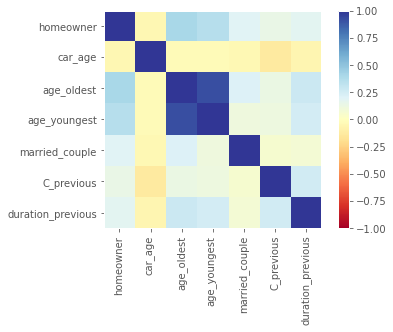

In [20]:
# heatmap
plt.imshow(
    DATA[predictors].corr(), # the correlation matrix
    vmin=-1,       # minimum value for the colorbar
    vmax=1,        # maximum value for the colorbar
    cmap="RdYlBu", # color scheme
)
plt.grid(False)
# label the axes:
plt.xticks(range(len(predictors)), labels=predictors, rotation=90)
plt.yticks(range(len(predictors)), labels=predictors)
plt.colorbar()

La correlación entre `age_youngest` y `age_oldest` es 0.917221 y, debido a esto, eliminamos `age_oldest`: los dos predictores son redundantes y contienen casi la misma información.


#### 8.3:
Vuelva a colocar `model4` después de descartar estos predictores redundantes; llámalo `model5`.

In [21]:
DATA_drop_oldest = DATA_region.drop(columns=['age_oldest'])
train_drop_oldest = DATA_drop_oldest.loc[idx_train]
test_drop_oldest = DATA_drop_oldest.loc[idx_test]
model5 = smf.ols(formula = "cost ~ region + car_value + A + E + F + G + homeowner + car_age + age_youngest + married_couple + C_previous + duration_previous + I(age_youngest**2) + I(car_age**2) + car_value*age_youngest", data = train_drop_oldest).fit()
print(model5.summary())

                            OLS Regression Results                            
Dep. Variable:                   cost   R-squared:                       0.368
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                     199.2
Date:                Thu, 17 Nov 2022   Prob (F-statistic):               0.00
Time:                        19:03:11   Log-Likelihood:                -62303.
No. Observations:               12352   AIC:                         1.247e+05
Df Residuals:                   12315   BIC:                         1.250e+05
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

Notamos que el coeficiente de `age_youngest` ha cambiado: ha pasado de `-2.634` en el modelo anterior a `-2.322`. En casos extremos, el signo del coeficiente puede incluso cambiar. Esto ilustra cuánto puede desestabilizar un modelo la multicolinealidad.

#### 8.4

¿Qué haría para diagnosticar el ajuste del `model5`? ¿Qué le sugiere este diagnóstico? (Sugerencia: intente graficar los residuos de varias maneras).


**Respuesta.** Un paso natural es visualizar los residuales, a través de gráficos como histogramas y el gráfico QQ. Comencemos con el histograma:

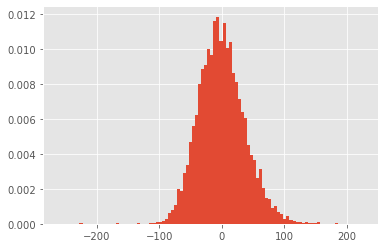

In [22]:
plt.hist(model5.resid, 
    density=True,     # 
    bins=100,         # 
    label="residuals" # label for legend
    );

Ahora miremos el QQplot

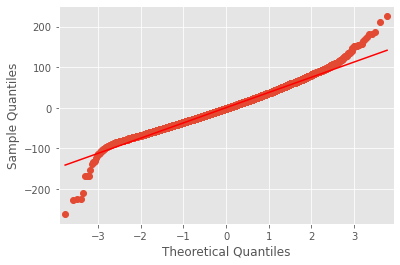

In [23]:
sm.qqplot(model5.resid, line="s");

Ahora empezamos a ver algunos problemas. Notamos que los cuantiles lejanos no se ajustan a la línea; esto significa que las colas son más anchas de lo que parecía al principio del histograma. Esto significa que debemos considerar algunas transformaciones de variables para volver a alinear esto.

### Ejercicio 9:

#### 9.1

Encuentre la mejor transformación de Box-Cox de `cost` utilizada para ajustarse al `model5`. ¿Qué valor obtienes?

In [24]:
from scipy import stats
price,fitted_lambda = stats.boxcox(DATA_drop_oldest['cost'])
round(fitted_lambda,2)

0.53

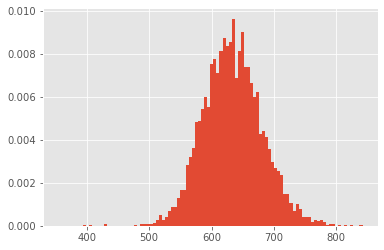

In [25]:
plt.hist(DATA_drop_oldest['cost'],density=True, bins = 100);

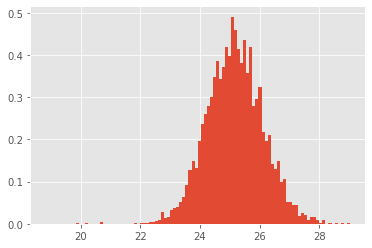

In [26]:
plt.hist(np.sqrt(DATA_drop_oldest['cost']),density=True, bins = 100);

Ambos se ven bien, aunque la transformación de la raíz cuadrada se ve un poco mejor visualmente.

#### 9.2

Reajustar `model5`, pero ahora con la transformación sugerida por Box-Cox. Llámalo `modelo6`.


In [27]:
DATA_drop_oldest['cost_sqrt'] = np.sqrt(DATA_drop_oldest['cost'])
train_drop_oldest = DATA_drop_oldest.loc[idx_train]
test_drop_oldest = DATA_drop_oldest.loc[idx_test]
model6 = smf.ols(formula = 'cost_sqrt ~ day + group_size + homeowner + car_age + car_value + risk_factor + age_youngest + married_couple + C_previous + duration_previous + A + B + C + D + E + F + G + region', data = train_drop_oldest).fit()
print(model6.summary())

                            OLS Regression Results                            
Dep. Variable:              cost_sqrt   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     174.0
Date:                Thu, 17 Nov 2022   Prob (F-statistic):               0.00
Time:                        21:21:04   Log-Likelihood:                -13960.
No. Observations:               12352   AIC:                         2.800e+04
Df Residuals:                   12311   BIC:                         2.831e+04
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              25.8493    

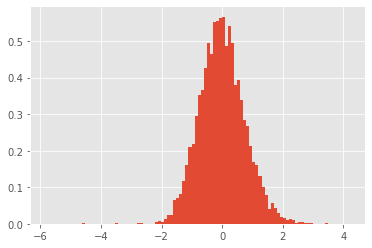

In [28]:
plt.hist(model6.resid, 
    density=True,     
    bins=100,         
    label="residuals" 
    );

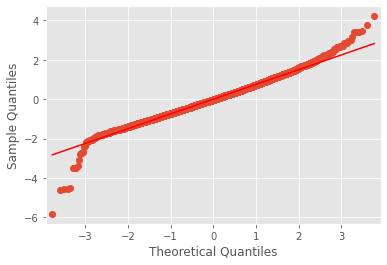

In [29]:
sm.qqplot(model6.resid, line="s");

Vemos que el AIC de `model6` es mucho mejor que el de `model5`. Sin embargo, la trama QQ todavía muestra un comportamiento de cola extraño.